# 随机抽样

numpy.random 模块对 Python 内置的 random 进行了补充，增加了一些用于高效生成多种概率分布的样本值的函数，如正态分布、泊松分布等。



- `numpy.random.seed(seed=None)` Seed the generator.

`seed()`用于指定随机数生成时所用算法开始的整数值，如果使用相同的`seed()`值，则每次生成的随机数都相同，如果不设置这个值，则系统根据时间来自己选择这个值，此时每次生成的随机数因时间差异而不同。

在对数据进行预处理时，经常加入新的操作或改变处理策略，此时如果伴随着随机操作，最好还是指定唯一的随机种子，避免由于随机的差异对结果产生影响。

---
# 离散型随机变量
## 二项分布
二项分布可以用于只有一次实验只有两种结果，各结果对应的概率相等的多次实验的概率问题。比如处理猜10次拳赢6次的概率等类似的问题。

二项分布概率函数的代码表示：binom.pmf(k) = choose(n, k) p\*\*k (1-p)\*\*(n-k)

二项分布概率函数的数学表示：

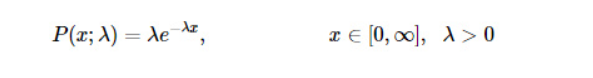


- `numpy.random.binomial(n, p, size=None)` Draw samples from a binomial distribution.

表示对一个二项分布进行采样，`size`表示采样的次数，`n`表示做了`n`重伯努利试验，`p`表示成功的概率，函数的返回值表示`n`中成功的次数。

【例】野外正在进行9（n=9）口石油勘探井的发掘工作，每一口井能够开发出油的概率是0.1（p=0.1）。请问，最终所有的勘探井都勘探失败的概率？
```python
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

np.random.seed(20200605)
n = 9# 做某件事情的次数
p = 0.1# 做某件事情成功的概率
size = 50000
x = np.random.binomial(n, p, size)
'''或者使用binom.rvs
#使用binom.rvs(n, p, size=1)函数模拟一个二项随机变量,可视化地表现概率
y = stats.binom.rvs(n, p, size=size)#返回一个numpy.ndarray
'''
print(np.sum(x == 0) / size)  # 0.3897

plt.hist(x)
plt.xlabel('随机变量：成功次数')
plt.ylabel('样本中出现的次数')
plt.show()
#它返回一个列表，列表中每个元素表示随机变量中对应值的概率
s = stats.binom.pmf(range(10), n, p)
print(np.around(s, 3))
# [0.387 0.387 0.172 0.045 0.007 0.001 0.    0.    0.    0.   ]
```
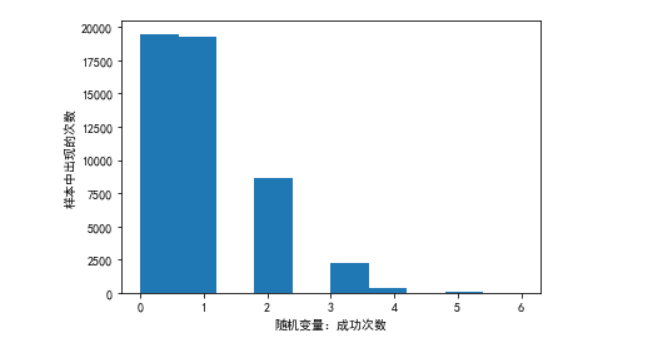


【例】模拟投硬币，投2次，请问两次都为正面的概率？
```python
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

np.random.seed(20200605)
n = 2# 做某件事情的次数,这里是投两次硬币
p = 0.5#做某件事情成功的概率，在这里即投硬币为正面的概率
size = 50000
x = np.random.binomial(n, p, size)
'''或者使用binom.rvs
#使用binom.rvs(n, p, size=1)函数模拟一个二项随机变量,可视化地表现概率
y = stats.binom.rvs(n, p, size=size)#返回一个numpy.ndarray
'''
print(np.sum(x == 0) / size)  # 0.25154
print(np.sum(x == 1) / size)  # 0.49874
print(np.sum(x == 2) / size)  # 0.24972

plt.hist(x, density=True)
plt.xlabel('随机变量：硬币为正面次数')
plt.ylabel('50000个样本中出现的次数')
plt.show()
#它返回一个列表，列表中每个元素表示随机变量中对应值的概率
s = stats.binom.pmf(range(n + 1), n, p)
print(np.around(s, 3))
# [0.25 0.5  0.25]
```
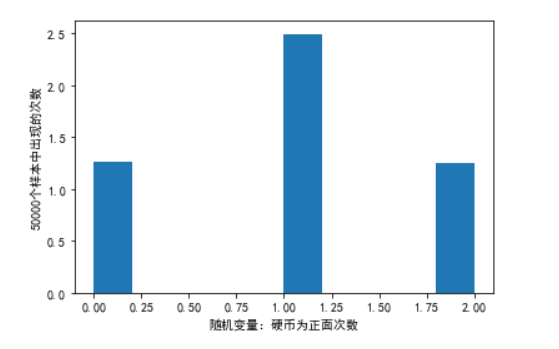

```
#计算期望和方差
'''
期望：E(x) = np
方差：Var(x) = np(1-p)
利用stats.binom.stats(n, p, loc=0, moments='mv')计算期望和方差
moments参数中:m为期望，v为方差
'''
```
## 泊松分布
泊松分布主要用于估计某个时间段某事件发生的概率。

泊松概率函数的代码表示：poisson.pmf(k) = exp(-lam) lam\*k / k!

泊松概率函数的数学表示：

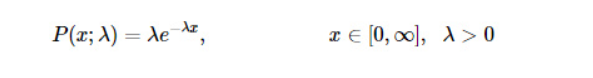

- `numpy.random.poisson(lam=1.0, size=None)` Draw samples from a Poisson distribution.

表示对一个泊松分布进行采样，`size`表示采样的次数，`lam`表示一个单位内发生事件的平均值，函数的返回值表示一个单位内事件发生的次数。

【例】假定某航空公司预定票处平均每小时接到42次订票电话，那么10分钟内恰好接到6次电话的概率是多少？

```python
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

np.random.seed(20200605)
lam = 42 / 6# 平均值：平均每十分钟接到42/6次订票电话
size = 50000
x = np.random.poisson(lam, size)
'''或者
#模拟服从泊松分布的50000个随机变量
x = stats.poisson.rvs(lam,size=size)
'''
print(np.sum(x == 6) / size)  # 0.14988

plt.hist(x)
plt.xlabel('随机变量：每十分钟接到订票电话的次数')
plt.ylabel('50000个样本中出现的次数')
plt.show()
#用poisson.pmf(k, mu)求对应分布的概率:概率质量函数 (PMF)
x = stats.poisson.pmf(6, lam)
print(x)  # 0.14900277967433773
```

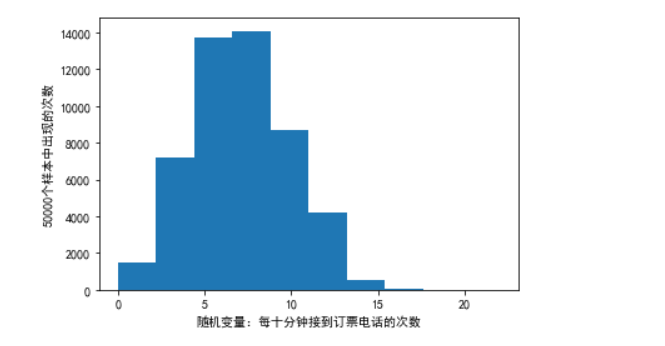


## 超几何分布

在超几何分布中，各次实验不是独立的，各次实验成功的概率也不等。
超几何分布概率函数的数学表示：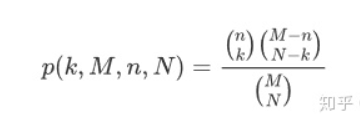


- `numpy.random.hypergeometric(ngood, nbad, nsample, size=None)` Draw samples from a Hypergeometric distribution.

表示对一个超几何分布进行采样，`size`表示采样的次数，`ngood`表示总体中具有成功标志的元素个数，`nbad`表示总体中不具有成功标志的元素个数，`ngood+nbad`表示总体样本容量，`nsample`表示抽取元素的次数（小于或等于总体样本容量），函数的返回值表示抽取`nsample`个元素中具有成功标识的元素个数。


【例】一共20只动物里有7只是狗，抽取12只有3只狗的概率（无放回抽样）。

```python
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

np.random.seed(20200605)
size = 500000
x = np.random.hypergeometric(ngood=7, nbad=13, nsample=12, size=size)
'''或者
#用rvs(M, n, N, loc=0, size=1, random_state=None)模拟
x = stats.hypergeom.rvs(M=20,n=7,N=12,size=size)
'''
print(np.sum(x == 3) / size)  # 0.198664

plt.hist(x, bins=8)
plt.xlabel('狗的数量')
plt.ylabel('50000个样本中出现的次数')
plt.title('超几何分布',fontsize=20)
plt.show()

"""
M 为总体容量
n 为总体中具有成功标志的元素的个数
N,k 表示抽取N个元素有k个是成功元素
"""
x = range(8)
#用hypergeom.pmf(k, M, n, N, loc)来计算k次成功的概率
s = stats.hypergeom.pmf(k=x, M=20, n=7, N=12)
print(np.round(s, 3))
# [0.    0.004 0.048 0.199 0.358 0.286 0.095 0.01 ]
```

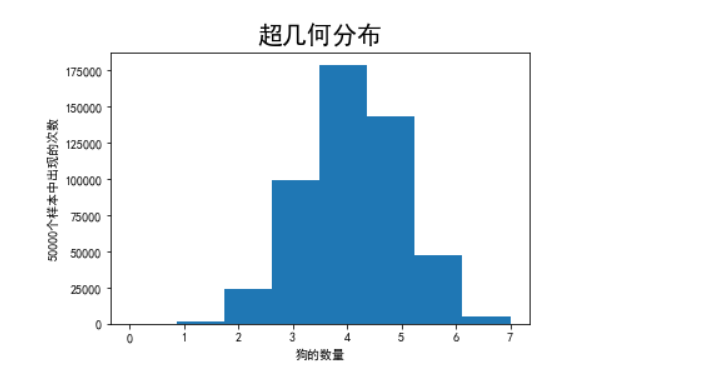
```
'''
超几何分布的均值与方差

均值E(x) = N(n/M)
方差Var(x) = N(n/M)(1-n/M)((M-N)/(M-1))
注释：考虑n次实验的超几何分布，令p=n/M,当总体容量足够大时((M-N)/(M-1))近似于1，此时数学期望为Np，方差为Np(1-p).
#用stats(M, n, N, loc=0, moments='mv')计算均值和方差
stats.hypergeom.stats(20,7,12,moments='mv')
'''
```

---
# 连续型随机变量

## 均匀分布

- `numpy.random.uniform(low=0.0, high=1.0, size=None)` Draw samples from a uniform distribution.

Samples are uniformly distributed over the half-open interval `[low, high)` (includes low, but excludes high).  In other words, any value within the given interval is equally likely to be drawn by `uniform`.

【例】在low到high范围内，创建大小为size的均匀分布的随机数。
```python
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

np.random.seed(20200614)
a = 0
b = 100
size = 50000
x = np.random.uniform(a, b, size=size)
print(np.all(x >= 0))  # True
print(np.all(x < 100))  # True
y = (np.sum(x < 50) - np.sum(x < 10)) / size
print(y)  # 0.40144

plt.hist(x, bins=20)
plt.show()

a = stats.uniform.cdf(10, 0, 100)
b = stats.uniform.cdf(50, 0, 100)
print(b - a)  # 0.4
```

![](https://img-blog.csdnimg.cn/20200614175837513.png)

作为`uniform()`的特列，可以得到`[0,1)`之间的均匀分布的随机数。

- `numpy.random.rand(d0, d1, ..., dn)`  Random values in a given shape.



Create an array of the given shape and populate it with random samples from a uniform distribution over `[0, 1)`.



【例】根据指定大小产生[0,1)之间均匀分布的随机数。

```python
import numpy as np

np.random.seed(20200614)
print(np.random.rand())
# 0.7594819171852776

print(np.random.rand(5))
# [0.75165827 0.16552651 0.0538581  0.46671446 0.89076925]

print(np.random.rand(4, 3))
# [[0.10073292 0.14624784 0.40273923]
#  [0.21844459 0.22226682 0.37246217]
#  [0.50334257 0.01714939 0.47780388]
#  [0.08755349 0.86500477 0.70566398]]

np.random.seed(20200614)
print(np.random.uniform())  # 0.7594819171852776
print(np.random.uniform(size=5))
# [0.75165827 0.16552651 0.0538581  0.46671446 0.89076925]

print(np.random.uniform(size=(4, 3)))
# [[0.10073292 0.14624784 0.40273923]
#  [0.21844459 0.22226682 0.37246217]
#  [0.50334257 0.01714939 0.47780388]
#  [0.08755349 0.86500477 0.70566398]]
```

作为`uniform`的另一特例，可以得到`[low,high)`之间均匀分布的随机整数。

- `numpy.random.randint(low, high=None, size=None, dtype='l')` Return random integers from `low` (inclusive) to `high` (exclusive).

Return random integers from the “discrete uniform” distribution of the specified dtype in the “half-open” interval [low, high). If high is None (the default), then results are from [0, low).


【例】若`high`不为`None`时，取[low,high)之间随机整数，否则取值[0,low)之间随机整数。
```python
import numpy as np

np.random.seed(20200614)
x = np.random.randint(2, size=10)
print(x)
# [0 0 0 1 0 1 0 0 0 0]

x = np.random.randint(1, size=10)
print(x)
# [0 0 0 0 0 0 0 0 0 0]

x = np.random.randint(5, size=(2, 4))
print(x)
# [[3 3 0 1]
#  [1 1 0 1]]

x = np.random.randint(1, 10, [3, 4])
print(x)
# [[2 1 7 7]
#  [7 2 4 6]
#  [8 7 2 8]]
```


## 正态分布

标准正态分布数学表示：
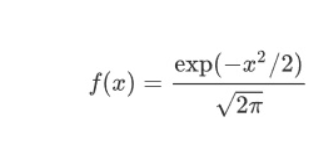

- `numpy.random.randn(d0, d1, ..., dn)` Return a sample (or samples) from the "standard normal" distribution.



【例】根据指定大小产生满足标准正态分布的数组（均值为0，标准差为1）。

```python
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

np.random.seed(20200614)
size = 50000
x = np.random.randn(size)
y1 = (np.sum(x < 1) - np.sum(x < -1)) / size
y2 = (np.sum(x < 2) - np.sum(x < -2)) / size
y3 = (np.sum(x < 3) - np.sum(x < -3)) / size
print(y1)  # 0.68596
print(y2)  # 0.95456
print(y3)  # 0.99744

plt.hist(x, bins=20)
plt.show()

y1 = stats.norm.cdf(1) - stats.norm.cdf(-1)
y2 = stats.norm.cdf(2) - stats.norm.cdf(-2)
y3 = stats.norm.cdf(3) - stats.norm.cdf(-3)
print(y1)  # 0.6826894921370859
print(y2)  # 0.9544997361036416
print(y3)  # 0.9973002039367398
```

![](https://img-blog.csdnimg.cn/20200614200342168.png)


还可以指定分布以及所需参数来进行随机，例如高斯分布中的mu和sigma。

- `numpy.random.normal(loc=0.0, scale=1.0, size=None)` Draw random samples from a normal (Gaussian) distribution.

`normal()`为创建均值为 loc（mu），标准差为 scale（sigma），大小为 size 的数组。
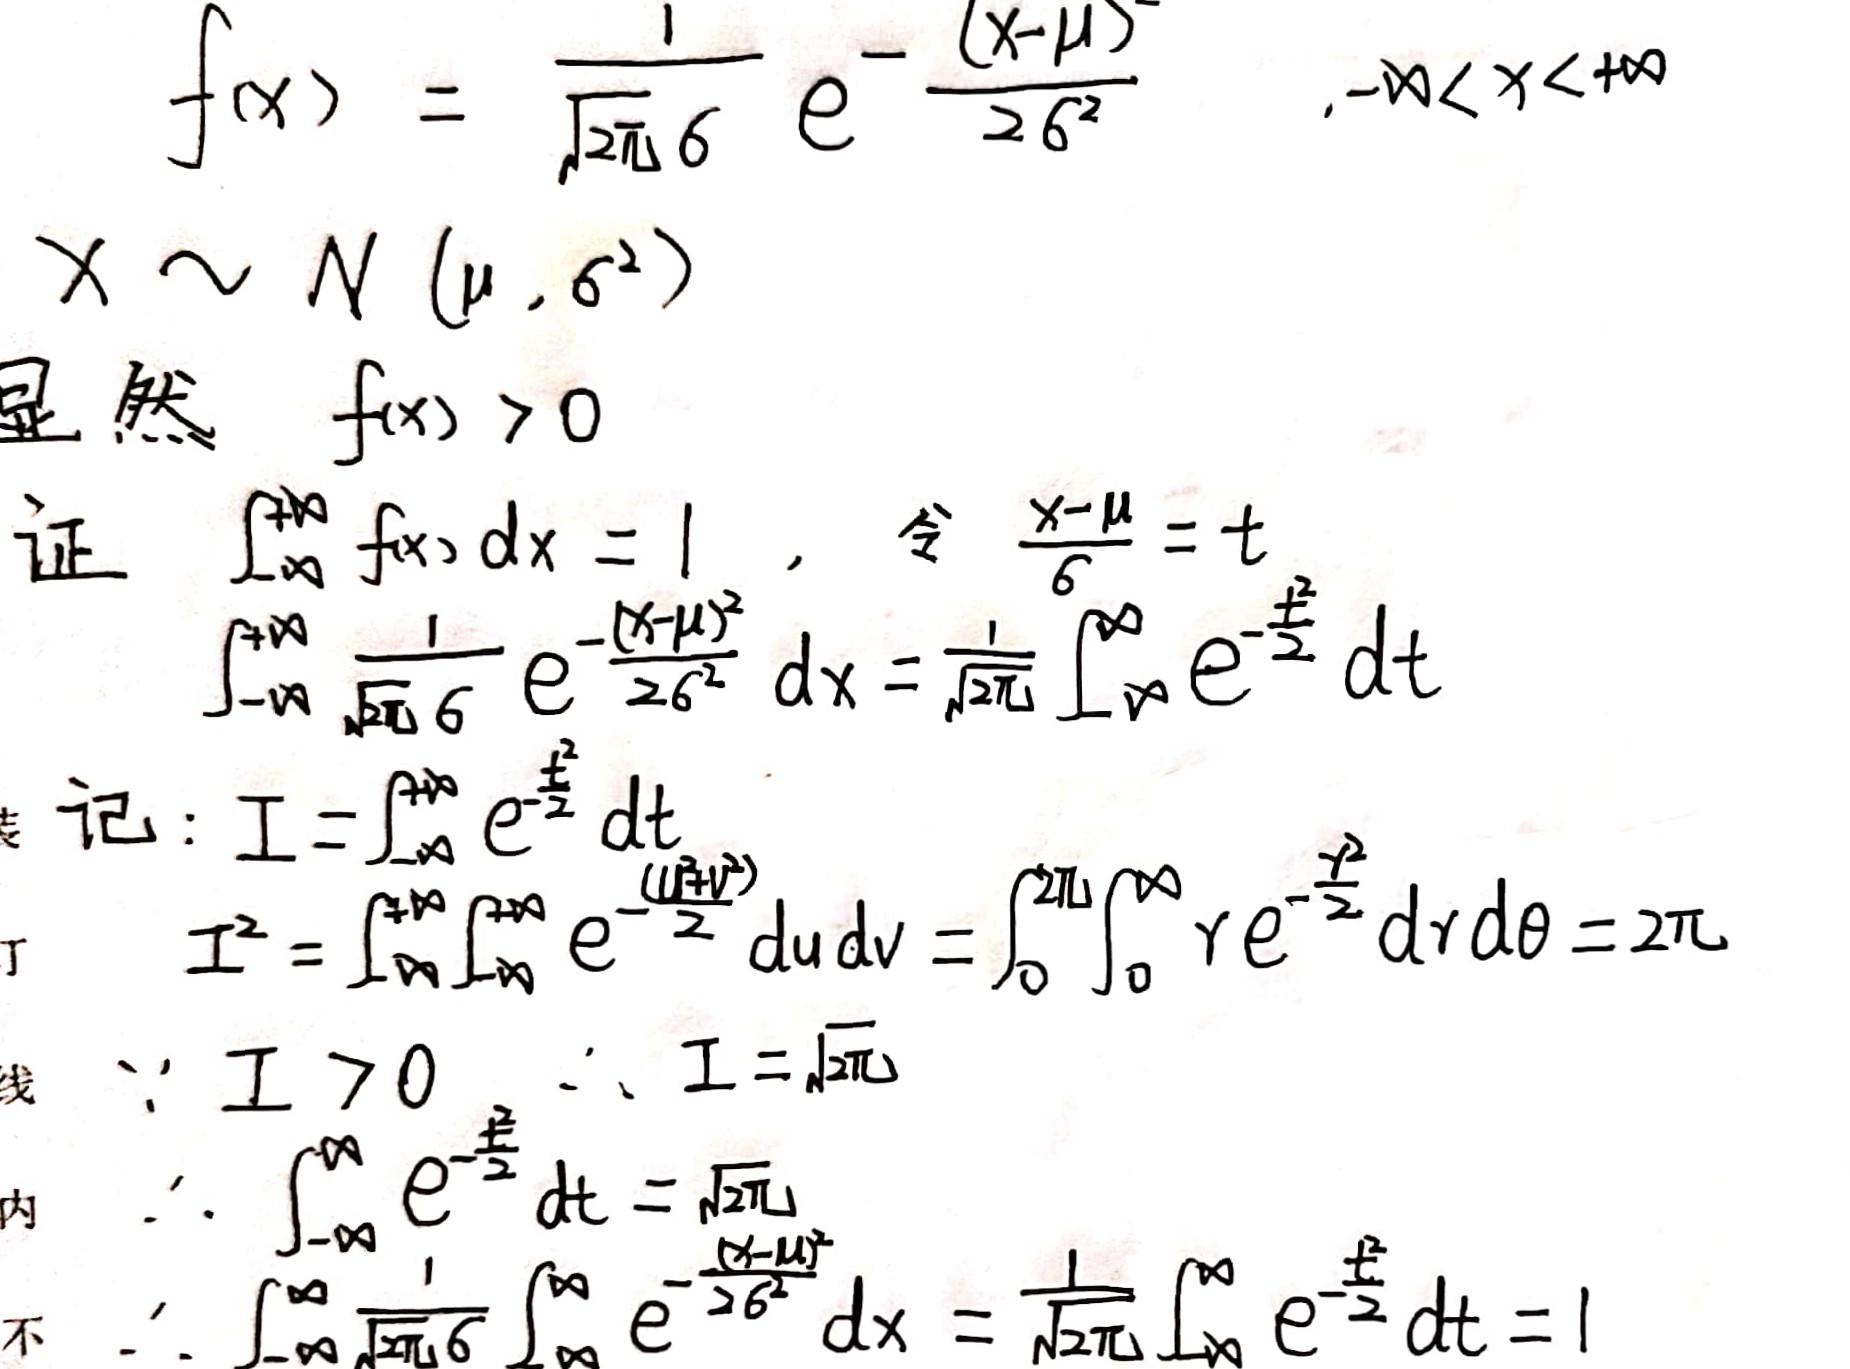

```python
sigma * np.random.randn(...) + mu
```

【例】
```python
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(20200614)
x = 0.5 * np.random.randn(2, 4) + 5
'''或者
#模拟10000个随机变量
x = 0.5*stats.norm.rvs(size=(2,4))+5
'''
print(x)
# [[5.39654234 5.4088702  5.49104652 4.95817289]
#  [4.31977933 4.76502391 4.70720327 4.36239023]]

np.random.seed(20200614)
mu = 5#平均值
sigma = 0.5#标准差
x = np.random.normal(mu, sigma, (2, 4))
print(x)
# [[5.39654234 5.4088702  5.49104652 4.95817289]
#  [4.31977933 4.76502391 4.70720327 4.36239023]]

size = 50000
x = np.random.normal(mu, sigma, size)

print(np.mean(x))  # 4.996403463175092
print(np.std(x, ddof=1))  # 0.4986846716715106（#样本标准差）
'''
ddof：int, optional
Means Delta Degrees of Freedom. The divisor used in calculations is N - ddof, where N represents the number of elements. By default ddof is zero.
'''
```
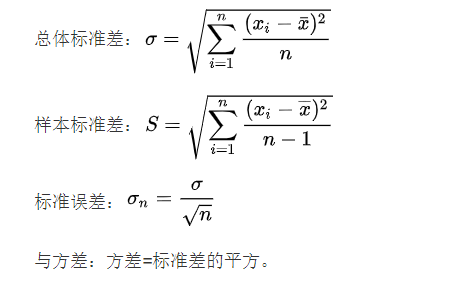
```
plt.hist(x, bins=20)
plt.show()
```

![](https://img-blog.csdnimg.cn/20200614204430538.png)

## 指数分布
指数分布描述时间发生的时间长度间隔。

指数分布的数学表示：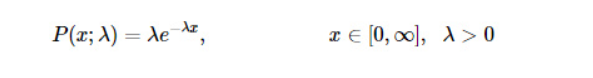

- `numpy.random.exponential(scale=1.0, size=None)` Draw samples from an exponential distribution.

【例】`scale = 1/lambda`
```python
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

np.random.seed(20200614)
lam = 7
size = 50000
x = np.random.exponential(1 / lam, size)
'''或者
#rvs(loc=0, scale=1/lam, size=size, random_state=None)模拟
'''
y1 = (np.sum(x < 1 / 7)) / size
y2 = (np.sum(x < 2 / 7)) / size
y3 = (np.sum(x < 3 / 7)) / size
print(y1)  # 0.63218
print(y2)  # 0.86518
print(y3)  # 0.95056

plt.hist(x, bins=20)
plt.show()

y1 = stats.expon.cdf(1 / 7, scale=1 / lam)
y2 = stats.expon.cdf(2 / 7, scale=1 / lam)
y3 = stats.expon.cdf(3 / 7, scale=1 / lam)
print(y1)  # 0.6321205588285577
print(y2)  # 0.8646647167633873
print(y3)  # 0.950212931632136
```

![](https://img-blog.csdnimg.cn/20200614211345205.png)


---
# 其它随机函数

## 随机从序列中获取元素
- `numpy.random.choice(a, size=None, replace=True, p=None)` Generates a random sample from a given 1-D array.

从序列中获取元素，若`a`为整数，元素取值从`np.range(a)`中随机获取；若`a`为数组，取值从`a`数组元素中随机获取。该函数还可以控制生成数组中的元素是否重复`replace`，以及选取元素的概率`p`。

【例】
```python
import numpy as np

np.random.seed(20200614)
x = np.random.choice(10, 3)
print(x)  # [2 0 1]

x = np.random.choice(10, 3, p=[0.05, 0, 0.05, 0.9, 0, 0, 0, 0, 0, 0])
print(x)  # [3 2 3]

x = np.random.choice(10, 3, replace=False, p=[0.05, 0, 0.05, 0.9, 0, 0, 0, 0, 0, 0])
print(x)  # [3 0 2]

aa_milne_arr = ['pooh', 'rabbit', 'piglet', 'Christopher']
x = np.random.choice(aa_milne_arr, 5, p=[0.5, 0.1, 0.1, 0.3])
print(x) # ['pooh' 'rabbit' 'pooh' 'pooh' 'pooh']

np.random.seed(20200614)
x = np.random.randint(0, 10, 3)
print(x)  # [2 0 1]
```
## 对数据集进行洗牌操作

数据一般都是按照采集顺序排列的，但是在机器学习中很多算法都要求数据之间相互独立，所以需要先对数据集进行洗牌操作。

- `numpy.random.shuffle(x)` Modify a sequence in-place by shuffling its contents.

This function only shuffles the array along the first axis of a multi-dimensional array. The order of sub-arrays is changed but their contents remains the same.

对`x`进行重排序，如果`x`为多维数组，只沿第 0 轴洗牌，改变原来的数组，输出为None。

【例】洗牌，改变自身内容，打乱顺序。
```python
import numpy as np

np.random.seed(20200614)
x = np.arange(10)
np.random.shuffle(x)
print(x)
# [6 8 7 5 3 9 1 4 0 2]

print(np.random.shuffle([1, 4, 9, 12, 15]))
# None

x = np.arange(20).reshape((5, 4))
print(x)
# [[ 0  1  2  3]
#  [ 4  5  6  7]
#  [ 8  9 10 11]
#  [12 13 14 15]
#  [16 17 18 19]]

np.random.shuffle(x)
print(x)
# [[ 4  5  6  7]
#  [ 0  1  2  3]
#  [ 8  9 10 11]
#  [16 17 18 19]
#  [12 13 14 15]]
```

- `numpy.random.permutation(x)` Randomly permute a sequence, or return a permuted range.

If `x` is a multi-dimensional array, it is only shuffled along its first index.
            
`permutation()`函数的作用与`shuffle()`函数相同，可以打乱第0轴的数据，但是它不会改变原来的数组。

【例】

```python
import numpy as np

np.random.seed(20200614)
x = np.arange(10)
y = np.random.permutation(x)
print(y)
# [6 8 7 5 3 9 1 4 0 2]

print(np.random.permutation([1, 4, 9, 12, 15]))
# [ 4  1  9 15 12]

x = np.arange(20).reshape((5, 4))
print(x)
# [[ 0  1  2  3]
#  [ 4  5  6  7]
#  [ 8  9 10 11]
#  [12 13 14 15]
#  [16 17 18 19]]

y = np.random.permutation(x)
print(y)
# [[ 8  9 10 11]
#  [ 0  1  2  3]
#  [12 13 14 15]
#  [16 17 18 19]
#  [ 4  5  6  7]]
```




---
**参考文献**
- https://www.jianshu.com/p/63434ad5ea64



In [1]:
dic={1:('I','V'),2:('X','L'),3:('C','D'),4:'M'}

In [2]:
dic[4]

'M'

'I'